# Cons of polynomial fitting

This notebook details some of the dangers of using naive polynomial fitting strategies for different data sets. This largely follows the methods used in previous notebooks for polynomial fitting.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Example 1

Consider the data set

|x|y|
|---|---|
|0.55|0.13|
|1.2|0.64|
|2|5.8|
|4|102|
|6.5|210|
|12|2030|
|16|3900|


In [21]:
x1 = np.array([0.55,1.2,2,4,6.5,12,16])
y1 = np.array([0.13,0.64,5.8,102,210,2030,3900])
n1 = len(x1)
npred1 = 100
xpred1 = np.linspace(0,18,num=npred1)
ypred1 = np.empty(npred1)

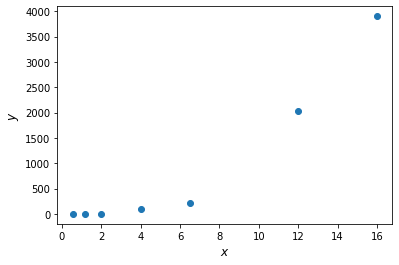

In [14]:
plt.plot(x1,y1,'o')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y$', fontsize=12);

Set up and solve the linear system of equations

In [15]:
Amx1 = np.empty((n1,n1))
for i in range(0,n1):
    for j in range(0,n1):
        Amx1[i,j] = x1[i]**float(j)
print(Amx1)

[[1.00000000e+00 5.50000000e-01 3.02500000e-01 1.66375000e-01
  9.15062500e-02 5.03284375e-02 2.76806406e-02]
 [1.00000000e+00 1.20000000e+00 1.44000000e+00 1.72800000e+00
  2.07360000e+00 2.48832000e+00 2.98598400e+00]
 [1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01]
 [1.00000000e+00 4.00000000e+00 1.60000000e+01 6.40000000e+01
  2.56000000e+02 1.02400000e+03 4.09600000e+03]
 [1.00000000e+00 6.50000000e+00 4.22500000e+01 2.74625000e+02
  1.78506250e+03 1.16029062e+04 7.54188906e+04]
 [1.00000000e+00 1.20000000e+01 1.44000000e+02 1.72800000e+03
  2.07360000e+04 2.48832000e+05 2.98598400e+06]
 [1.00000000e+00 1.60000000e+01 2.56000000e+02 4.09600000e+03
  6.55360000e+04 1.04857600e+06 1.67772160e+07]]


Solve the matrix equation

In [16]:
avec1 = np.linalg.inv(Amx1) @ y1

In [17]:
print(avec1)

[-1.80950697e+01  6.43127904e+01 -7.39915535e+01  3.48573100e+01
 -6.43792386e+00  5.08424667e-01 -1.38372623e-02]


Make model predictions and graph them to see what happens

In [22]:
for i in range(0,npred1):
    ypred1[i] = 0.0
    for j in range(0,n1): # loop over powers of polynomial
        ypred1[i] += avec1[j] * xpred1[i]**float(j)

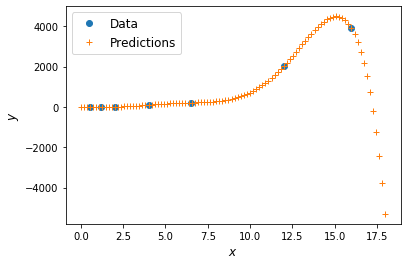

In [23]:
plt.plot(x1,y1,'o',label='Data')
plt.plot(xpred1, ypred1, '+', label='Predictions')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y$', fontsize=12)
plt.legend(fontsize=12);

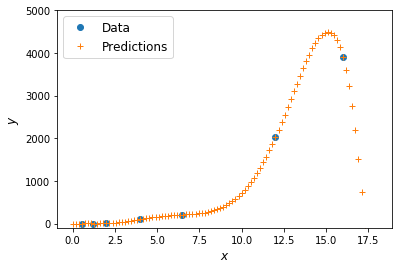

In [26]:
plt.plot(x1,y1,'o',label='Data')
plt.plot(xpred1, ypred1, '+', label='Predictions')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y$', fontsize=12)
plt.ylim(-100,5000)
plt.legend(fontsize=12);

## Example 2

Consider a data set measured at $x=-8,-7,-6,\ldots,6,7,8$ where all the measured $y$ values are zero. (same data set as in book Table 4.10 on page 153)

In [54]:
x2 = np.arange(-8,8+1) # +1 because this function goes to end point - 1
n2 = len(x2)
y2 = np.zeros(n2)
# add some small, random perturbations so not all exactly zero
np.random.seed(1) # make sure random values are same every time you run the notebook
y2 = [0 + 0.01* np.random.normal() for y in y2]

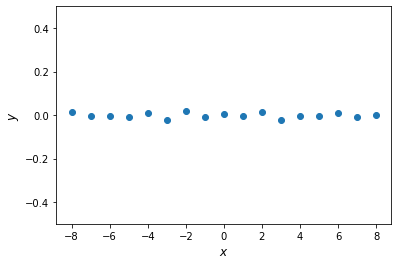

In [55]:
plt.plot(x2,y2,'o')
plt.xlabel('$x$', fontsize=12)
plt.ylim(-0.5,0.5)
plt.ylabel('$y$', fontsize=12);

In [56]:
Amx2 = np.empty((n2,n2))
for i in range(0,n2):
    for j in range(0,n2):
        Amx2[i,j] = x2[i]**float(j)
#print(Amx2)

I didn't print out the matrix, but you can... It's a 17x17 matrix so it has 289 elements. I hope you are not planning to set these up by hand!

In [57]:
avec2 = np.linalg.solve(Amx2, y2) # another way of solving the matrix equation

In [58]:
print(avec2)

[ 3.19039096e-03  6.15564893e-03 -2.05647040e-02 -4.57447924e-03
  1.55468376e-02  1.08671425e-03 -3.56214977e-03 -1.14540497e-04
  3.53918303e-04  5.99877581e-06 -1.76322036e-05 -1.61713600e-07
  4.58624150e-07  2.13859764e-09 -5.91905759e-09 -1.09382658e-11
  2.97787970e-11]


Hm.... All the values are very small.

How about the way we did it before, with the inverse? `np.linalg.solve` basically does that for us, but does it make a difference?

In [60]:
avec2 = np.linalg.inv(Amx2) @ y2

In [61]:
print(avec2)

[ 3.19039096e-03  6.15564893e-03 -2.05647040e-02 -4.57447924e-03
  1.55468376e-02  1.08671425e-03 -3.56214977e-03 -1.14540497e-04
  3.53918303e-04  5.99877581e-06 -1.76322036e-05 -1.61713600e-07
  4.58624150e-07  2.13859764e-09 -5.91905759e-09 -1.09382658e-11
  2.97787970e-11]


Same result, good.

In [68]:
npred2 = 100
xpred2 = np.linspace(-8.1,8.1,num=npred2)
ypred2 = np.empty(npred2)

In [69]:
for i in range(0,npred2):
    ypred2[i] = 0.0
    for j in range(0,n2):
        ypred2[i] += avec2[j] * xpred2[i]**float(j)

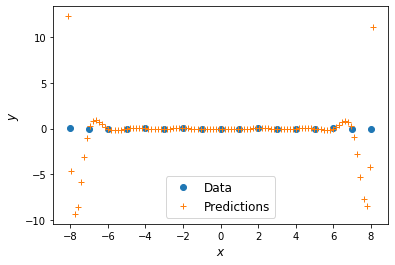

In [70]:
plt.plot(x2,y2,'o',label='Data')
plt.plot(xpred2, ypred2, '+', label='Predictions')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y$', fontsize=12)
plt.legend(fontsize=12);

Even though the coefficients are all small, this polynomial goes off to crazy town near the end points and really goes wild beyond the end points.

## Example 3

An example with a large gap in $x$ values in the data set

In [73]:
x3 = np.linspace(-1,1,num=11)
x3 = np.append(x3,5)
print(x3)

[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1.   5. ]


In [74]:
np.random.seed(1)
y3 = [np.random.random() for x in x3]

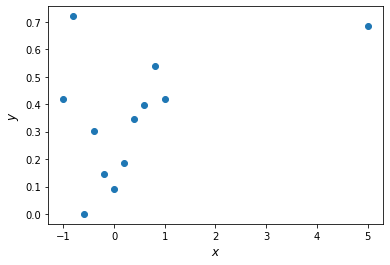

In [76]:
plt.plot(x3,y3,'o')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y$', fontsize=12);

A bunch of closely spaced points from $-1$ to $1$ and one way out at $x=5$

In [77]:
n3 = len(x3)
Amx3 = np.empty((n3,n3))
for i in range(0,n3):
    for j in range(0,n3):
        Amx3[i,j] = x3[i]**float(j)

In [79]:
avec3 = np.linalg.solve(Amx3, y3)

In [80]:
print(avec3)

[ 9.23386110e-02  2.21936161e-01  1.75299962e+00 -3.98531163e+00
  4.69162367e+00  2.41248738e+01 -5.87021032e+01 -3.71108078e+01
  1.19804408e+02  4.36253354e+00 -6.72211580e+01  1.23878622e+01]


In [84]:
npred3 = 1000
xpred3 = np.linspace(-1.1,5.1,num=npred3)
ypred3 = np.empty(npred3)
for i in range(0,npred3):
    ypred3[i] = 0.0
    for j in range(0,n3):
        ypred3[i] += avec3[j] * xpred3[i]**float(j)

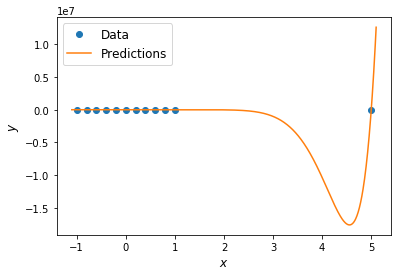

In [86]:
plt.plot(x3,y3,'o',label='Data')
plt.plot(xpred3, ypred3, '-', label='Predictions')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y$', fontsize=12)
plt.legend(fontsize=12);

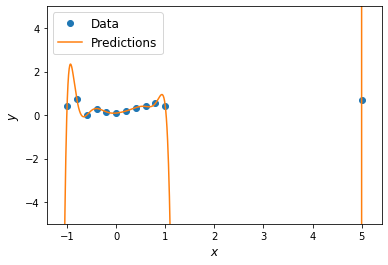

In [88]:
plt.plot(x3,y3,'o',label='Data')
plt.plot(xpred3, ypred3, '-', label='Predictions')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y$', fontsize=12)
plt.ylim(-5,5)
plt.legend(fontsize=12);